# PROJECT 3

## CLASSIFICATION

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline
#warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
Data=pd.read_csv('data.csv')

In [3]:
Data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,Yes,No,No,1,0


### Shape of Dataset

In [4]:
Data.shape

(38312, 17)

### Correlation Matrix

In [5]:
Numeric_Data=Data.select_dtypes(exclude=['object'])
Numeric_Data.corr()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Trainings_Attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.024345
Year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.017991
Last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.119690
Year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.012287
Targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.224518
Previous_Award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.201434
Training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.178448
Promoted_or_Not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,1.000000


### Giving a Graphical Representation of Correlation Matrix

Text(0.5, 1.05, 'Correlation Matrix')

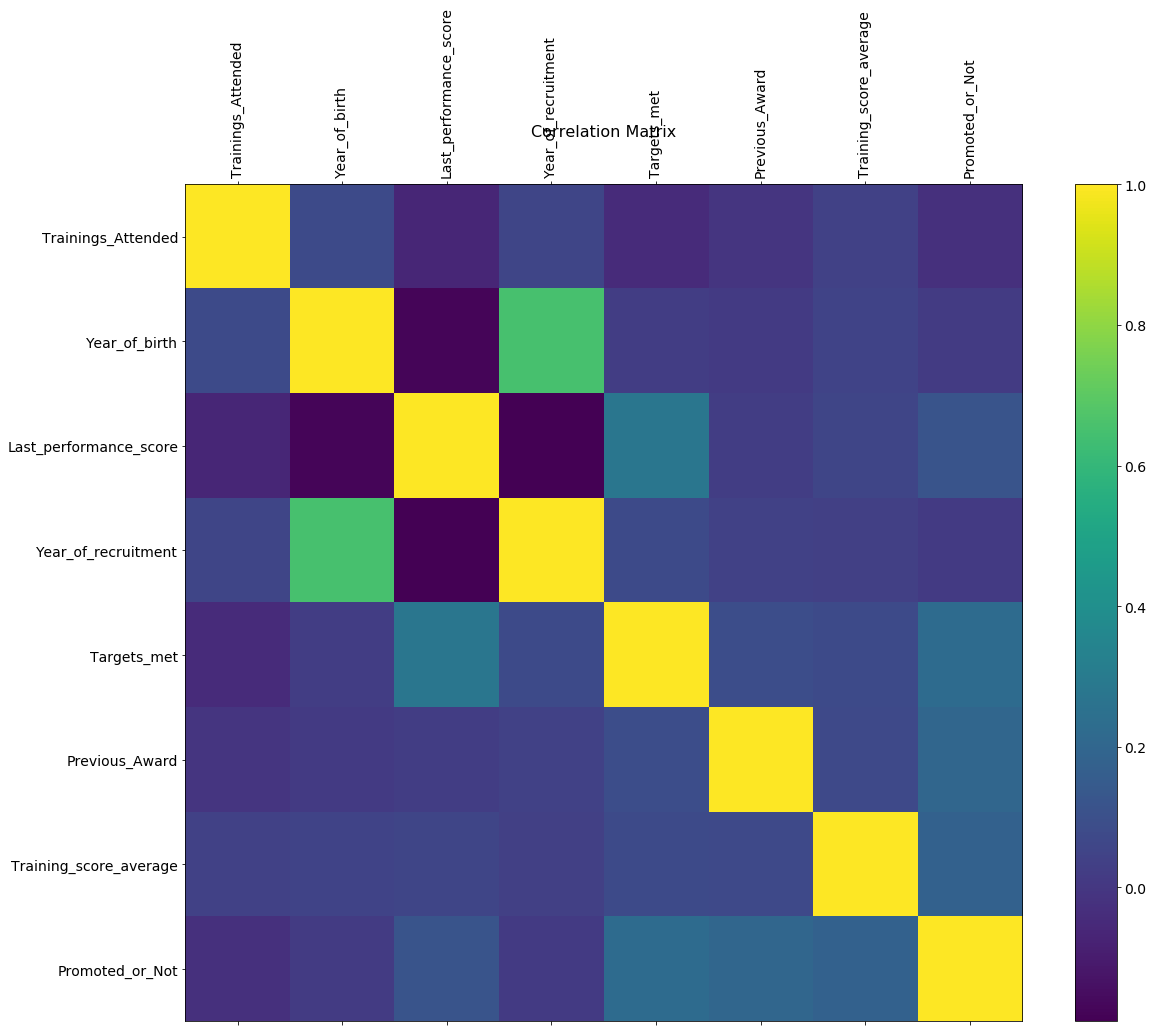

In [6]:
f=plt.figure(figsize=(19,15))
plt.matshow(Numeric_Data.corr(), fignum=f.number)
plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)
plt.yticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

There is a strong positive correlation (0.65) between 'Year of birth' and 'Year of recruitment'. 'Last_performance_score also has a positive correlation with 'Target_met'. The target variable has a positive correlation with 'Last_performance_score' (0.12), 'Target_met'(0.22),'Previous_Award'(0.20) and 'Training_score_average'(0.18)

### Checking for Missing Values 

In [7]:
Data.isna().mean().round(4) * 100

EmployeeNo                             0.00
Division                               0.00
Qualification                          4.38
Gender                                 0.00
Channel_of_Recruitment                 0.00
Trainings_Attended                     0.00
Year_of_birth                          0.00
Last_performance_score                 0.00
Year_of_recruitment                    0.00
Targets_met                            0.00
Previous_Award                         0.00
Training_score_average                 0.00
Foreign_schooled                       0.00
Past_Disciplinary_Action               0.00
Previous_IntraDepartmental_Movement    0.00
No_of_previous_employers               0.00
Promoted_or_Not                        0.00
dtype: float64

In [8]:
Data.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
Foreign_schooled                          0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

1679 representing 4.38% of the 'Qualification' observation is missing. This is a categorical feature.

### Missing Value Imputation 

#### Checking to see the qualification with the most observations (count)

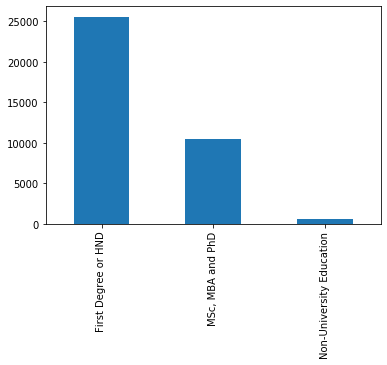

In [9]:
Data['Qualification'].value_counts().plot(kind='bar')

#### Replacing missing values with 'First Degree or HND' 

In [10]:
Data['Qualification'].fillna("First Degree or HND", inplace=True)

In [11]:
Data.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

## Feature Engineer

#### Creating 'Age' feature by subtracting the year of birth of each employee from 2019 

In [12]:
Data['Age'] = 2019-Data['Year_of_birth']

#### Creating 'Years with Establishment' feature by subtracting the year_of_recruitment of each employee from 2019

In [13]:
Data['Years with Establishment'] = 2019-Data['Year_of_recruitment']

#### Creating whether or not a staff started his/her career at the firm 

In [14]:
Data['Entry at company']=np.where(Data['No_of_previous_employers']=='0','Yes','No')

#### Using last performance score of an employee and whether or not they met their target to determine their dedication

An employee is considered dedicated if they scored above 7 in their last performance assessment and also met their target

In [15]:
for i, row in Data.iterrows():
    if (Data.loc[i, 'Last_performance_score']>6 and Data.loc[i, 'Targets_met']==1):
        Data.loc[i, 'Dedication']='Dedicated'
    else:
        Data.loc[i, 'Dedication']='Not dedicated'
    

#### Categorizing Last Performance Score into Low, Average and High 

In [16]:
Perf_Score=[]

# Using a for loop to populate the list
for score in Data['Last_performance_score']:
    if (score>-1 and score<6):
         Perf_Score.append('Low')
    elif (score>4 and score<11):
         Perf_Score.append('Average')
    else:
         Perf_Score.append('High')

# Storing the data as a column in Data_With_New_Features
Data['Perfomance Rating'] = Perf_Score

#### Creating New Feature, Training and Award

This feature categorizes employees into Few trainings without award, Few trainings with award,More trainings with award and More trainings without award

In [17]:
for i, row in Data.iterrows():
    if (Data.loc[i, 'Trainings_Attended']<6 and Data.loc[i, 'Previous_Award']==0):
        Data.loc[i, 'Training and Award']='Few trainings without award'
    elif (Data.loc[i, 'Trainings_Attended']<6 and Data.loc[i, 'Previous_Award']==1):
        Data.loc[i, 'Training and Award']='Few trainings with award'
    elif (Data.loc[i, 'Trainings_Attended']>5 and Data.loc[i, 'Previous_Award']==1):
        Data.loc[i, 'Training and Award']='More trainings with award'
    else:
        Data.loc[i, 'Training and Award']='More trainings without award'

In [18]:
Data['Training and Award'].value_counts()

Few trainings without award     37287
Few trainings with award          885
More trainings without award      138
More trainings with award           2
Name: Training and Award, dtype: int64

## EDA 

## Summary Statistics for Features

In [19]:
Data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeNo,38312,38312,YAK/S/18077,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Division,38312,9,Commercial Sales and Marketing,11695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qualification,38312,3,First Degree or HND,27257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,38312,2,Male,26880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel_of_Recruitment,38312,3,Agency and others,21310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trainings_Attended,38312,NaN,NaN,NaN,2.25368,0.609443,2,2,2,2,11
Year_of_birth,38312,NaN,NaN,NaN,1986.21,7.64605,1950,1982,1988,1992,2001
Last_performance_score,38312,NaN,NaN,NaN,7.69896,3.74414,0,5,7.5,10,12.5
Year_of_recruitment,38312,NaN,NaN,NaN,2013.14,4.26145,1982,2012,2014,2016,2018
Targets_met,38312,NaN,NaN,NaN,0.352996,0.477908,0,0,0,1,1


#### KDE plot for Last Performance Score

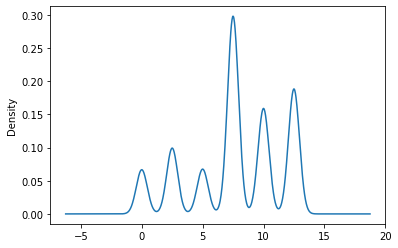

In [20]:
Data.Last_performance_score.plot.kde()

#### KDE plot for Training Score Average

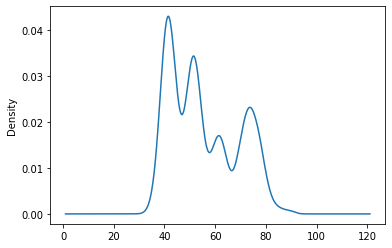

In [21]:
Data.Training_score_average.plot.kde()

#### Pie Chart showing the number of employees who met their target from the various Training and Award categories

In [22]:
Data.groupby('Training and Award').sum()['Targets_met'].sort_values(ascending=False)

Training and Award
Few trainings without award     12932
Few trainings with award          568
More trainings without award       23
More trainings with award           1
Name: Targets_met, dtype: int64

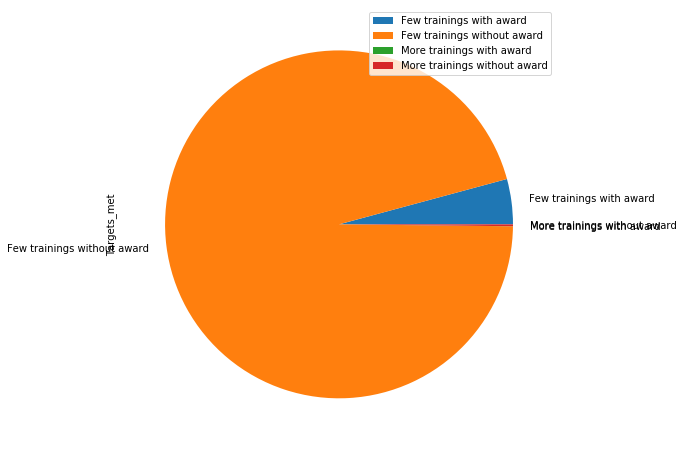

In [23]:
Data.groupby('Training and Award').sum().plot(kind='pie', y='Targets_met', figsize=(18,8))

#### Percentage of Each Qualification with Promotion

In [24]:
Percentage_Promoted=Data.groupby('Qualification')['Promoted_or_Not'].mean()*100
Percentage_Promoted

Qualification
First Degree or HND         7.986939
MSc, MBA and PhD            9.666635
Non-University Education    8.873720
Name: Promoted_or_Not, dtype: float64

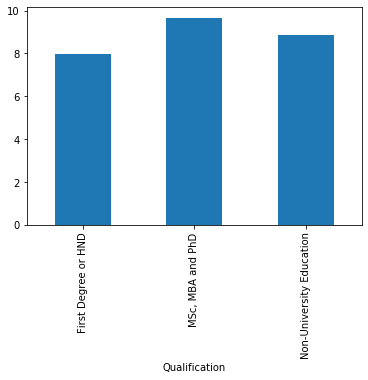

In [25]:
Percentage_Promoted.plot(kind='bar')

#### Average Age of Promoted Employees and Non-Promoted Employees

In [26]:
Data.groupby('Promoted_or_Not')['Age'].mean()

Promoted_or_Not
0    32.832483
1    32.338167
Name: Age, dtype: float64

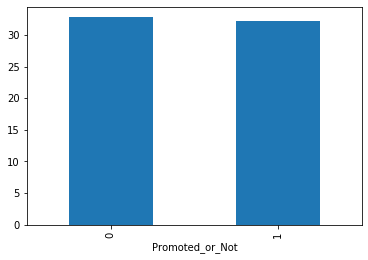

In [27]:
Data.groupby('Promoted_or_Not')['Age'].mean().plot(kind='bar')

####  Boxplot Showing Last Performance Score for Promoted and Unpromoted Employees

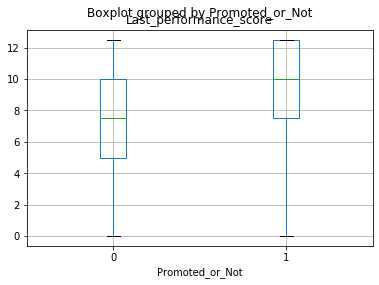

In [28]:
Data.boxplot(by='Promoted_or_Not', column=['Last_performance_score'], grid=True)

####  Boxplot Showing Age Distribution for Promoted and Unpromoted Employees

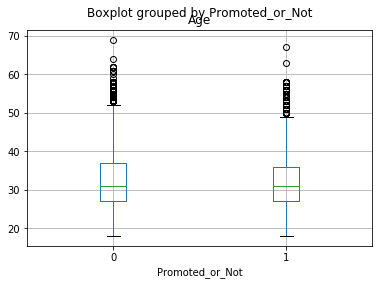

In [29]:
Data.boxplot(by='Promoted_or_Not', column=['Age'], grid=True)

####  Boxplot Showing Last Performance Score for Foreign Schooled and Locally Schooled Employees

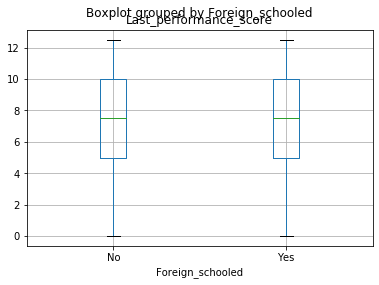

In [30]:
Data.boxplot(by='Foreign_schooled', column=['Last_performance_score'], grid=True)

#### Barplot Showing the Perfomance Score for Male and Female Employees in the Various Divisions

<Figure size 1368x1080 with 0 Axes>

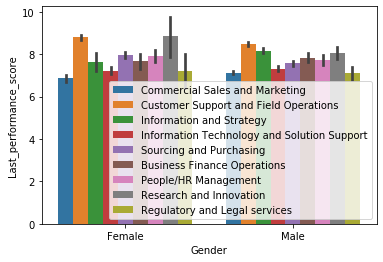

<Figure size 1368x1080 with 0 Axes>

In [31]:
sns.barplot(x='Gender',y='Last_performance_score',data=Data,hue='Division')
plt.legend(loc='best')
plt.figure(figsize=(19,15))

#### Barplot Showing the Perfomance Score for Foreign and Locally Schooled Employees for Whether or Not They Met Their Target

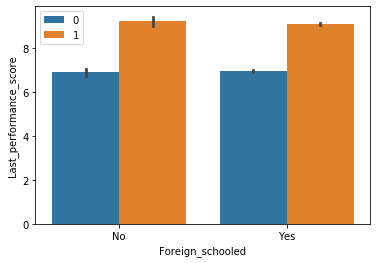

In [32]:
sns.barplot(x='Foreign_schooled',y='Last_performance_score',data=Data,hue='Targets_met')
plt.legend(loc='best')

#### Barplot Showing the Perfomance Score for Performance Rating for Whether or Not They are Dedication

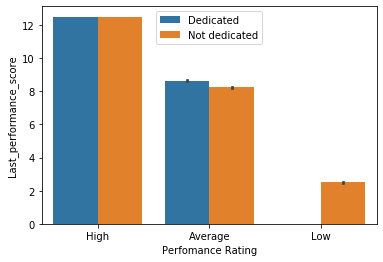

In [33]:
sns.barplot(x='Perfomance Rating',y='Last_performance_score',data=Data,hue='Dedication')
plt.legend(loc='best')

### Checking For Class Imbalance

Plotting a histogram to give a graphical presentation of imbalance

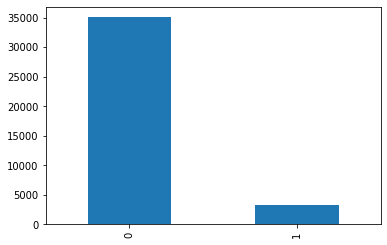

In [34]:
Data['Promoted_or_Not'].value_counts().plot(kind='bar')

#### Calculating Percentage of Minority and Majority Classes

In [35]:
(Data['Promoted_or_Not'].value_counts()/38312)*100

0    91.54051
1     8.45949
Name: Promoted_or_Not, dtype: float64

There is class imbalance. The minority class has a percentage of 8.45949% to 91.54051%.

#### Dropping Employee ID

In [36]:
Data.drop('EmployeeNo', axis=1, inplace=True)

#### Selecting Object Variables for Encoding

In [37]:
Object_data=Data.select_dtypes(include=['object'])

#### OneHot Encoding Object Variables

In [38]:
Object_data_dummies = pd.get_dummies(Object_data)

#### Merging Encoded Variables to The Original Data 

In [39]:
Data_for_Model = pd.concat([Data, Object_data_dummies], axis=1)

#### Dropping Object Features From The Final Data 

In [40]:
Data_for_Model = Data_for_Model.select_dtypes(exclude=['object'])

### Using Synthetic Minority Oversampling Technique

#### Importing Smote from Imblearn Package 

In [41]:
from imblearn.over_sampling import SMOTE

#### Separating input features and target 

In [42]:
y=Data_for_Model['Promoted_or_Not']
x=Data_for_Model.drop('Promoted_or_Not',axis=1)

#### Splitting data into test and train data

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#### Using SMOTE to Oversample Observations

In [44]:
sm=SMOTE(random_state=42,ratio=1.0)
X_train,y_train=sm.fit_sample(X_train,y_train)

In [45]:
sum(y_train == 1)

28075

In [46]:
sum(y_train == 0)

28075

### Importing Dependencies for Models

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Binary Logistic Regression

In [147]:
#lr = LogisticRegression()

#### Hyperparameter Tuning for Logistic Regression

In [148]:
'''penalty = ['l1', 'l2']

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]

solver = ['liblinear', 'saga']



param_grid = dict(penalty=penalty,

                  C=C,

                  class_weight=class_weight,

                  solver=solver)



grid = GridSearchCV(estimator=lr,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)'''

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 21.5min finished


Best Score:  0.8136003581782827
Best Params:  {'C': 0.1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}


#### Fitting Model Using Best Parameters from GridSearch

In [150]:
lr = LogisticRegression(C= 0.1, class_weight= {1: 0.6, 0: 0.4}, penalty= 'l2', solver= 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting Using Test Data

In [151]:
lr_pred = lr.predict(X_test)

#### Confusion Matrix

In [152]:
confusion_matrix(y_test, lr_pred)

array([[4929, 2067],
       [  80,  587]], dtype=int64)

#### Accuracy Score for Logistic Regression Model

In [154]:
logit_acc=accuracy_score(y_test, lr_pred)

#### Prediction Score for Logistic Regression Model

In [155]:
logit_pre=precision_score(y_test, lr_pred,average='macro')

#### Recall Score for Logistic Regression Model

In [157]:
logit_recall=recall_score(y_test, lr_pred,average='macro')

#### F1 Score for Logistic Regression Model

In [158]:
logit_f1=f1_score(y_test, lr_pred,average='macro')

In [160]:
logit_f1

0.58733291520985

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      6996
           1       0.22      0.88      0.35       667

    accuracy                           0.72      7663
   macro avg       0.60      0.79      0.59      7663
weighted avg       0.92      0.72      0.78      7663



#### 5 fold Cross Validation for Logistic Regression Model

In [162]:
logit_scores=cross_val_score(lr,X_train,y_train,cv=5)

#### Cross Validation Scores for The 5 folds

In [163]:
logit_scores

array([0.8126447 , 0.8173642 , 0.81629564, 0.81691897, 0.81549421])

#### Mean Score For Cross Validation

In [164]:
logit_scores.mean()

0.8157435440783616

#  

### Decision Tree Classifier

In [62]:
#dtc= DecisionTreeClassifier()

#### Hyperparameter Tuning for Decision Tree Classifier

In [165]:
'''criterion=['gini','entropy']
presort=[True,False]

param_grid = dict(criterion=criterion,presort=presort)



grid = GridSearchCV(estimator=dtc,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)'''

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.1s finished


Best Score:  0.9389573897252844
Best Params:  {'criterion': 'entropy', 'presort': True}


#### Fitting Model Using Best Parameters from GridSearch

In [167]:
dtc= DecisionTreeClassifier(criterion= 'entropy', presort= True)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')

#### Predicting Using Test Data

In [168]:
dtc_pred = dtc.predict(X_test)

#### Confusion Matrix

In [169]:
confusion_matrix(y_test, dtc_pred)

array([[6569,  427],
       [ 418,  249]], dtype=int64)

#### Accuracy Score for Decision Tree Classifier

In [171]:
dtc_acc=accuracy_score(y_test, dtc_pred)

#### Precision Score for Decision Tree Classifier

In [172]:
dtc_pre=precision_score(y_test, dtc_pred,average='macro')

#### Recall Score for Decision Tree Classifier

In [173]:
dtc_recall=recall_score(y_test, dtc_pred,average='macro')

#### F1 Score for Decision Tree Classifier

In [174]:
dtc_f1=f1_score(y_test, dtc_pred,average='macro')

In [175]:
dtc_f1

0.655190546503948

#### Classification Report

In [176]:
print(classification_report(y_test,  dtc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6996
           1       0.37      0.37      0.37       667

    accuracy                           0.89      7663
   macro avg       0.65      0.66      0.66      7663
weighted avg       0.89      0.89      0.89      7663



#### 5 Fold Cross Validation for Decision Tree Classifier

In [177]:
dtc_scores=cross_val_score(dtc,X_train,y_train,cv=5)

#### Cross Validation Score For The 5 Folds

In [178]:
dtc_scores

array([0.84443455, 0.96162066, 0.96482636, 0.96179875, 0.96322351])

#### Average Score for The 5 Folds

In [179]:
dtc_scores.mean()

0.9391807658058772

#  

### Random Forest

In [180]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
#rf.fit(X_train, y_train)

#### Hyperparameter Tuning for Random Forest 

In [181]:
'''criterion=['gini','entropy']
bootstrap=[True,False]
n_estimators=[10,100,1000]
param_grid = dict(criterion=criterion,bootstrap=presort,n_estimators=n_estimators)



grid = GridSearchCV(estimator=rf,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)'''

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.8min finished


Best Score:  0.9542700867813109
Best Params:  {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 1000}


#### Fitting Model Using Best Parameters from GridSearch

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', n_estimators= 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Predicting Using Test Data

In [247]:
rf_pred=rf.predict(X_test)

#### Confusion Matrix

In [184]:
confusion_matrix(y_test, rf_pred)

array([[6913,   83],
       [ 524,  143]], dtype=int64)

#### Accuracy Score for Random Forest Classifier

In [185]:
rf_acc=accuracy_score(y_test, rf_pred)

#### Precision Score for Random Forest Classifier

In [186]:
rf_pre=precision_score(y_test, rf_pred,average='macro')

#### Recall Score for Random Forest Classifier

In [187]:
rf_recall=recall_score(y_test, rf_pred,average='macro')

#### F1 Score for Random Forest Classifier

In [188]:
rf_f1=f1_score(y_test, rf_pred,average='macro')

In [189]:
rf_f1

0.6391061792338681

In [190]:
print(classification_report(y_test,  rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6996
           1       0.63      0.21      0.32       667

    accuracy                           0.92      7663
   macro avg       0.78      0.60      0.64      7663
weighted avg       0.90      0.92      0.90      7663



#### 5 Fold Cross Validation for Random Forest Classifier

In [191]:
rf_scores=cross_val_score(rf,X_train,y_train,cv=5)

#### Cross Validation Score for the 5 Folds (Random Forest Classifier)

In [192]:
rf_scores

array([0.81015138, 0.99162956, 0.99349955, 0.99091719, 0.9920748 ])

#### Average Cross Validation Score (Random Forest Classifier)

In [214]:
rf_scores.mean()

0.9556544968833481

#  

### Support Vector Machine

In [212]:
#from sklearn import svm
#sv = svm.SVC(kernel='linear') 

#### Hyperparameter Tuning for Support Vector Machine

In [215]:
'''C = [0.01, 0.1, 1, 10]
gamma=[0.1,1,10]

param_grid = dict(C=C,gamma=gamma)



grid = GridSearchCV(estimator=sv,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)'''

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 29.1min finished


Best Score:  0.7043957473344938
Best Params:  {'C': 0.01, 'gamma': 0.1}


#### Fitting Model Using Best Parameters from GridSearch

In [216]:
sv = svm.SVC(kernel='linear',C=0.01,gamma=0.1) 
sv.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting Using Test Data

In [217]:
sv_pred = sv.predict(X_test)

#### Confusion Matrix For SVM Predictor

In [218]:
confusion_matrix(y_test, sv_pred)

array([[5275, 1721],
       [ 221,  446]], dtype=int64)

#### Accuracy Score for SVM

In [219]:
svm_acc=accuracy_score(y_test, sv_pred)

#### Precision Score for SVM

In [220]:
svm_pre=precision_score(y_test, sv_pred,average='macro')

#### Recall Score for SVM

In [221]:
svm_recall=recall_score(y_test, sv_pred,average='macro')

#### F1 Score for SVM

In [222]:
svm_f1=f1_score(y_test, sv_pred,average='macro')

In [223]:
svm_f1

0.5796449883182824

In [224]:
print(classification_report(y_test,  sv_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      6996
           1       0.21      0.67      0.31       667

    accuracy                           0.75      7663
   macro avg       0.58      0.71      0.58      7663
weighted avg       0.89      0.75      0.80      7663



#### 5 Fold Cross Validation for SVM

In [225]:
sv_scores=cross_val_score(sv,X_train,y_train,cv=5)

#### Cross Validation Score for 5 folds

In [226]:
sv_scores

array([0.71255565, 0.70463045, 0.70276046, 0.7032057 , 0.70053428])

#### Average Cross Validation Score for SVM

In [227]:
sv_scores.mean()

0.7047373107747106

#  

### xgBoost

#### Splitting Data Into Test and Train Datasets

In [194]:
X_boost_train,X_boost_test,y_boost_train,y_boost_test=train_test_split(x.values,y.values,test_size=0.2,random_state=42)

#### Applying SMOTE on Data

In [195]:
X_boost_train,y_boost_train=sm.fit_sample(X_boost_train,y_boost_train)
#X_boost_test,y_boost_test=sm.fit_sample(X_boost_test,y_boost_test)

In [196]:
#import xgboost as xgb
#xgboost=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

#### Hyperparameter Tuning for XGBoost

In [197]:
'''gamma=[ 0.01, 0.1]
learning_rate=[0.01, 0.1]

param_grid = dict(gamma=gamma,learning_rate=learning_rate)



grid = GridSearchCV(estimator=xgboost,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)'''

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Best Score:  0.9401582690545197
Best Params:  {'gamma': 0.01, 'learning_rate': 0.1}


#### Fitting Model Using Best Parameters from GridSearch

In [198]:
xgboost=xgb.XGBClassifier(random_state=42,learning_rate=0.1,gamma=0.01)
xgboost.fit(X_boost_train, y_boost_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Predicting Using Test Data

In [199]:
xgb_pred = xgboost.predict(X_boost_test)

In [200]:
xgb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Confusion Matrix for XGBoost

In [201]:
confusion_matrix(y_boost_test, xgb_pred)

array([[6955,   41],
       [ 517,  150]], dtype=int64)

#### Accuracy Score for XGBoost

In [202]:
xgb_acc=accuracy_score(y_boost_test, xgb_pred)

#### Precision Score for XGBoost

In [203]:
xgb_pre=precision_score(y_boost_test, xgb_pred,average='macro')

#### Recall Score for XGBoost

In [204]:
xgb_recall=recall_score(y_boost_test, xgb_pred,average='macro')

#### F1 Score for XGBoost

In [205]:
xgb_f1=f1_score(y_boost_test, xgb_pred,average='macro')

In [206]:
xgb_f1

0.6555412378608397

In [207]:
print(classification_report(y_boost_test,  xgb_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6996
           1       0.79      0.22      0.35       667

    accuracy                           0.93      7663
   macro avg       0.86      0.61      0.66      7663
weighted avg       0.92      0.93      0.91      7663



#### 5 Fold Cross Validation for XGBoost

In [208]:
xgb_scores=cross_val_score(xgboost,X_boost_train,y_boost_train,cv=5)

#### Cross Validation Score for XGBoost

In [209]:
xgb_scores

array([0.7871772 , 0.98317008, 0.98005343, 0.97996438, 0.98040962])

#### Average Cross Validation Score for XGBoost

In [210]:
xgb_scores.mean()

0.9421549421193232

#  

## Creating a Table to Score Metrics for The Various Models

In [228]:
Summary=[['Binary Logistic Regression',logit_acc,logit_pre,logit_recall,logit_f1],
      [ 'Decision Tree Classifier',dtc_acc,dtc_pre,dtc_recall,dtc_f1],
      [ 'Random Forest Classifier',rf_acc,rf_pre,rf_recall,rf_f1],
      [ 'Support Vector Machine Classifier',svm_acc,svm_pre,svm_recall,svm_f1],
      [ 'xgBoost Classifier',xgb_acc,xgb_pre,xgb_recall,xgb_f1] 
]

Performance_Summary=pd.DataFrame(Summary)

#### Renaming Columns

In [229]:
Performance_Summary.columns=['Classifier','Accuracy','Precision','Recall','F1 Score']

#### Sorting Models by Their F1 Score in Descending Order

In [230]:
Performance_Summary.sort_values(by='F1 Score', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1 Score
4,xgBoost Classifier,0.927183,0.858074,0.609514,0.655541
1,Decision Tree Classifier,0.889730,0.654259,0.656139,0.655191
2,Random Forest Classifier,0.920788,0.781142,0.601264,0.639106
0,Binary Logistic Regression,0.719823,0.602602,0.792303,0.587333
3,Support Vector Machine Classifier,0.746574,0.582802,0.711334,0.579645


## ROC Curve For Models

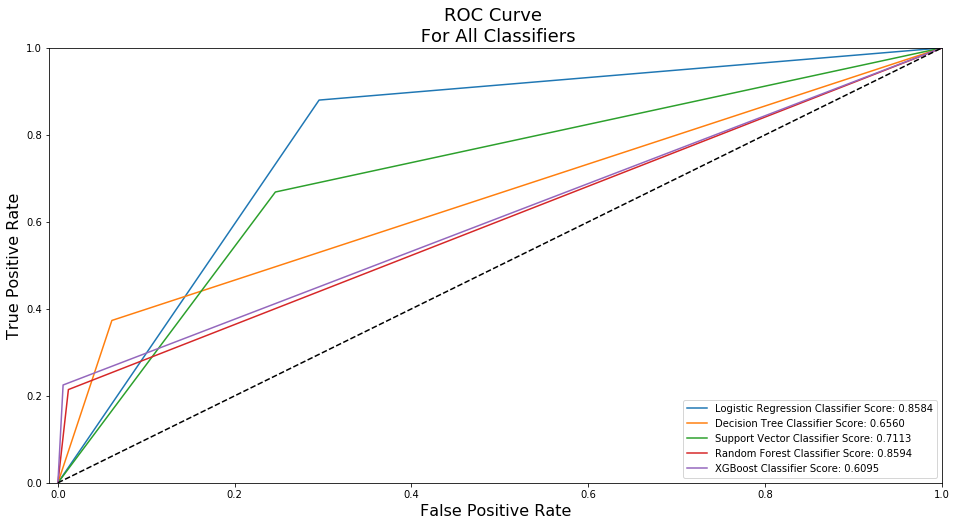

In [231]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, dtc_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, sv_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_pred)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_boost_test, xgb_pred)



def graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr, svc_fpr, svc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n For All Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])))
    plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, sv_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_boost_test, xgb_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    #plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                #arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                #)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr, svc_fpr, svc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr)
plt.show()

## Feature Importance

In [125]:
columns=Data_for_Model.drop('Promoted_or_Not',axis=1).columns

#### Feature Importance for Logistic Regression

In [254]:
#Logistic_feature_imp = pd.DataFrame(lr.feature_importances_,columns)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [127]:
#Logistic_feature_imp.columns=['Importance']

In [128]:
#Logistic_feature_imp.sort_values(by='Importance', ascending=False)

#### Plotting A Bar Chart for Features 

In [129]:
#Logistic_feature_imp.plot(kind='barh')


#### Feature Importance for Decision Tree

In [130]:
dtc_feature_imp = pd.DataFrame(dtc.feature_importances_,columns)

In [131]:
dtc_feature_imp.columns=['Importance']

In [132]:
dtc_feature_imp.sort_values(by='Importance', ascending=False)

,Importance
Targets_met,0.265229
Training_score_average,0.169883
Channel_of_Recruitment_Agency and others,0.081174
No_of_previous_employers_1,0.064105
Division_Commercial Sales and Marketing,0.059132
Perfomance Rating_High,0.036172
Division_Customer Support and Field Operations,0.026527
Previous_Award,0.025446
Division_Sourcing and Purchasing,0.024276
Gender_Male,0.024143


#### Plotting Bar Chart For Feature Importance (Decision Tree)

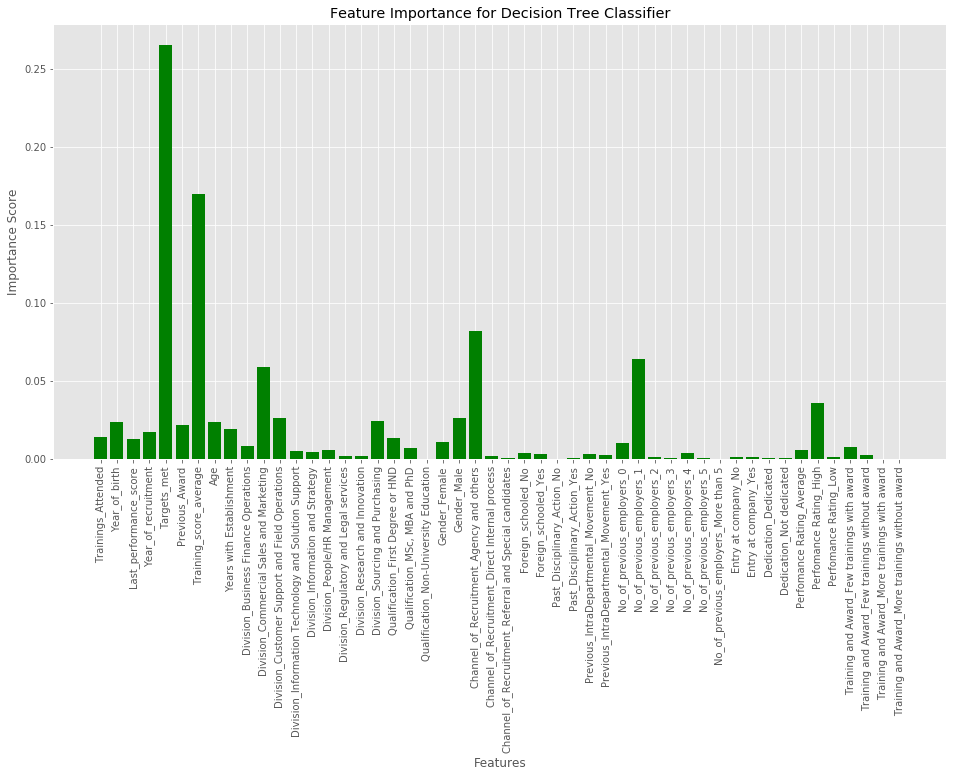

In [253]:
plt.style.use('ggplot')

dtc_col = columns
dtc_scores = dtc.feature_importances_

dtc_pos = [i for i, _ in enumerate(dtc_col)]

plt.figure(figsize=(16,8))
plt.bar(dtc_pos, dtc_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Decision Tree Classifier")
plt.xticks(dtc_pos,dtc_col,rotation=90)

plt.show()

#### Feature Importance for Random Forest

In [249]:
rf_feature_imp = pd.DataFrame(rf.feature_importances_,columns)

In [250]:
rf_feature_imp.columns=['Importance']

In [251]:
rf_feature_imp.sort_values(by='Importance', ascending=False)

,Importance
Training_score_average,0.105988
Targets_met,0.104009
Dedication_Dedicated,0.058071
Dedication_Not dedicated,0.055004
Channel_of_Recruitment_Direct Internal process,0.044250
Channel_of_Recruitment_Agency and others,0.043081
No_of_previous_employers_1,0.035133
Age,0.033783
Year_of_birth,0.033729
Year_of_recruitment,0.028215


#### Bar Chart For Feature Importance (Random Forest)

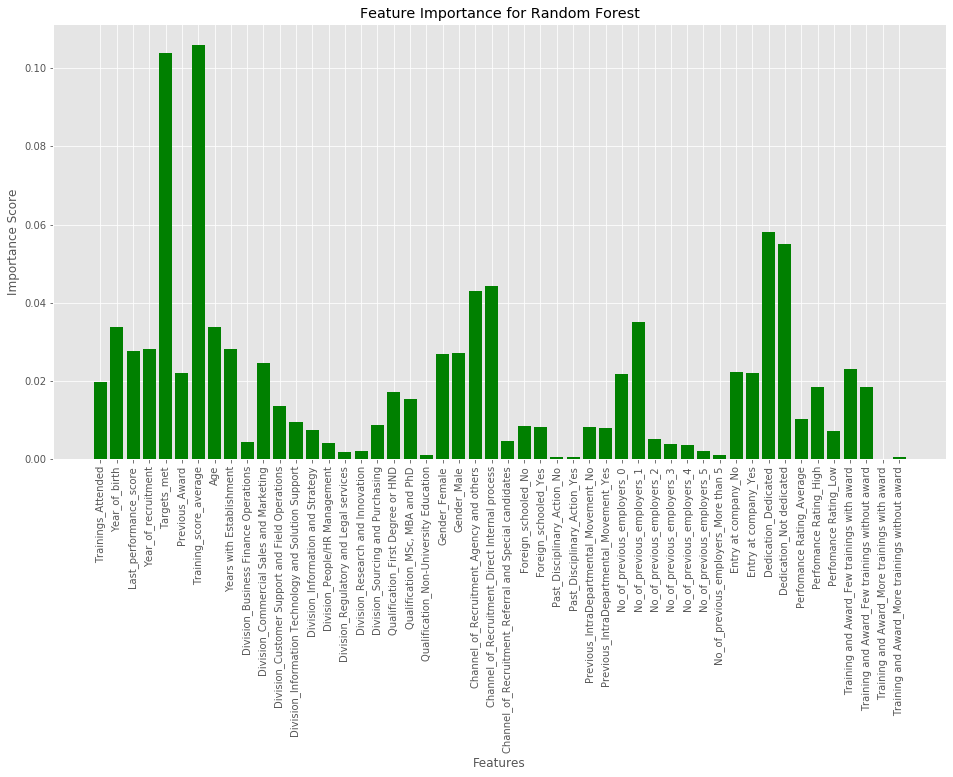

In [252]:
plt.style.use('ggplot')

rf_col = columns
rf_scores = rf.feature_importances_

rf_pos = [i for i, _ in enumerate(rf_col)]

plt.figure(figsize=(16,8))
plt.bar(rf_pos, rf_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Random Forest")
plt.xticks(rf_pos,rf_col,rotation=90)

plt.show()

#### Feature Importance for XGBoost

In [235]:
xgboost_feature_imp = pd.DataFrame(xgboost.feature_importances_,columns)

In [139]:
xgboost_feature_imp.columns=['Importance']

In [140]:
xgboost_feature_imp.sort_values(by='Importance', ascending=False,)

,Importance
Channel_of_Recruitment_Direct Internal process,0.115190
Targets_met,0.097058
Training and Award_Few trainings with award,0.075658
No_of_previous_employers_1,0.071757
Gender_Female,0.070580
Perfomance Rating_High,0.053065
Qualification_First Degree or HND,0.051605
Trainings_Attended,0.050994
Channel_of_Recruitment_Agency and others,0.049539
No_of_previous_employers_0,0.046701


In [256]:
"""plt.style.use('ggplot')

sv_col = columns
sv_scores = sv.feature_importances_

xgb_pos = [i for i, _ in enumerate(sv_col)]

plt.figure(figsize=(16,8))
plt.bar(sv_pos, xgboost_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for XGBoost")
#plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)
plt.xticks(sv_pos,sv_col,rotation=90)

plt.show()"""

'plt.style.use(\'ggplot\')\n\nsv_col = columns\nsv_scores = sv.feature_importances_\n\nxgb_pos = [i for i, _ in enumerate(sv_col)]\n\nplt.figure(figsize=(16,8))\nplt.bar(sv_pos, xgboost_scores, color=\'green\')\nplt.xlabel("Features")\nplt.ylabel("Importance Score")\nplt.title("Feature Importance for XGBoost")\n#plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)\nplt.xticks(sv_pos,sv_col,rotation=90)\n\nplt.show()'

#### Bar Chart for Feature Importance (XGBoost)

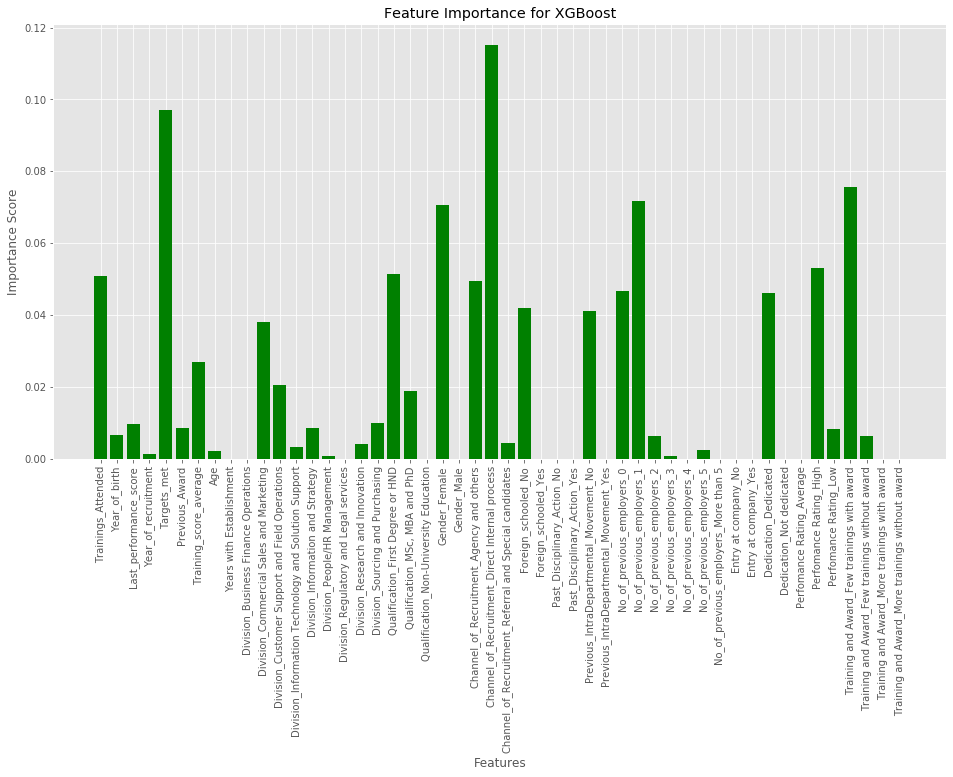

In [242]:
plt.style.use('ggplot')

xgb_col = columns
xgboost_scores = xgboost.feature_importances_

xgb_pos = [i for i, _ in enumerate(xgb_col)]

plt.figure(figsize=(16,8))
plt.bar(xgb_pos, xgboost_scores, color='green')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for XGBoost")
#plt.xticks(range(Numeric_Data.shape[1]),Numeric_Data.columns,fontsize=14, rotation=90)
plt.xticks(xgb_pos,xgb_col,rotation=90)

plt.show()

## Maximum Hard Voting Ensemble Model

#### Importing Voting Classifier from Scikit Learn

In [142]:
from sklearn.ensemble import VotingClassifier

#### Instantiating and Using Hard Voting 

In [232]:
voting_clf = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', dtc), ('Random Forest',rf),('SVM',sv),('XGB',xgboost)],
voting = 'hard')

#### Comparing  Models Using Their F1 Score

In [233]:
from sklearn import model_selection
labels = ['Logistic Regression', 'Decision Tree', 'Support Vector', 'XGBoost','Random Forest','Ensemble']
for (clf, label) in zip([lr, dtc,sv,xgboost,rf, voting_clf], labels):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=5, 
                                              scoring='f1')
    print("F1 Score: %0.2f  [%s]" 
          % (scores.mean(),  label))

F1 Score: 0.83  [Logistic Regression]
F1 Score: 0.94  [Decision Tree]
F1 Score: 0.69  [Support Vector]
F1 Score: 0.93  [XGBoost]
F1 Score: 0.95  [Random Forest]
F1 Score: 0.94  [Ensemble]
